In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("C:\\Users\\jaich\\Downloads\\Training\\Training\\0\\Training_99949469.jpg")

In [4]:
img_array.shape #rgb

(48, 48, 3)

In [5]:
print(img_array)

[[[107 107 107]
  [110 110 110]
  [112 112 112]
  ...
  [ 92  92  92]
  [ 95  95  95]
  [ 90  90  90]]

 [[105 105 105]
  [107 107 107]
  [101 101 101]
  ...
  [ 97  97  97]
  [106 106 106]
  [ 95  95  95]]

 [[110 110 110]
  [111 111 111]
  [107 107 107]
  ...
  [ 94  94  94]
  [112 112 112]
  [102 102 102]]

 ...

 [[135 135 135]
  [151 151 151]
  [151 151 151]
  ...
  [ 45  45  45]
  [ 43  43  43]
  [ 42  42  42]]

 [[133 133 133]
  [141 141 141]
  [132 132 132]
  ...
  [ 44  44  44]
  [ 55  55  55]
  [ 51  51  51]]

 [[136 136 136]
  [133 133 133]
  [125 125 125]
  ...
  [ 60  60  60]
  [ 65  65  65]
  [ 68  68  68]]]


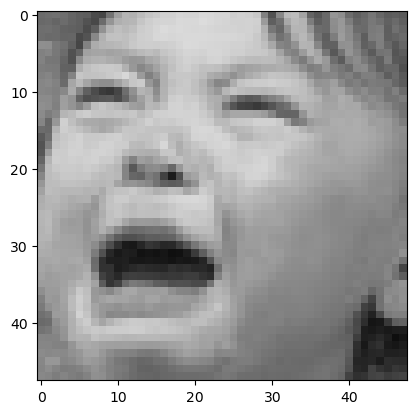

In [6]:
plt.imshow(img_array) ##BGR

In [7]:
Datadirectory = r"C:\Users\jaich\Downloads\Training\Training"

In [8]:
Classes=["0","1","2","3","4","5","6"] ##List of classes => exact name of our folder

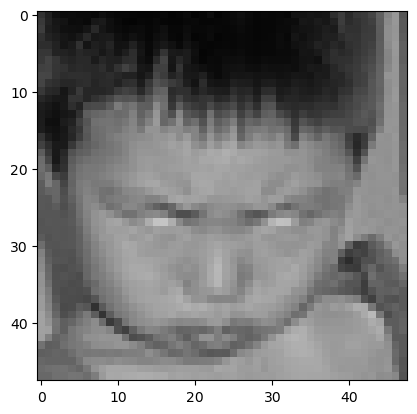

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

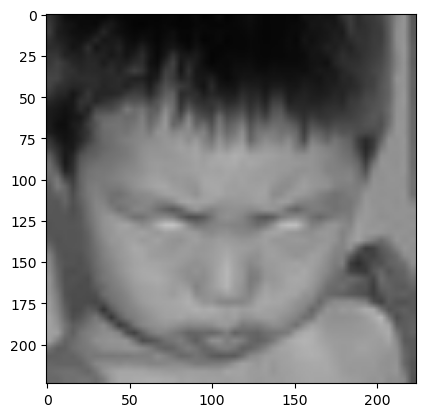

In [10]:
img_size = 224  # ImageNet=>224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
rgb_image = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

In [11]:
new_array.shape

(224, 224, 3)

In [12]:
training_Data=[] #data array

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num=Classes.index(category) ##0 1, ##label
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_Data()

In [13]:
print(len(training_Data))

28709


Number of images: 28709
Number of labels: 28709
Shape of images: (28709, 100, 100, 3)
Labels: [2 4 5 ... 2 3 3]


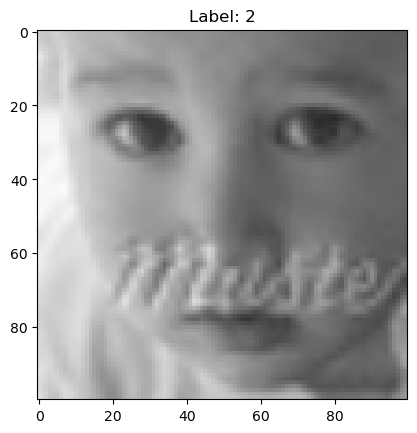

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Define your classes
Classes = ["0", "1", "2", "3", "4", "5", "6"]
# Path to your training data directory
Datadirectory = "Downloads/Training/Training"
# Initialize lists to store images and labels
images = []
labels = []
# Load images and labels
for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = int(category)  # Convert class category to integer
    for img in os.listdir(path):
        try:
            # Read image and resize if necessary
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img_array = cv2.resize(img_array, (100, 100))  # Resize if needed
            # Append image and label to lists
            images.append(img_array)
            labels.append(class_num)
        except Exception as e:
            print("Error:", e)
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Shuffle images and labels together
shuffle_indices = np.random.permutation(len(images))
images_shuffled = images[shuffle_indices]
labels_shuffled = labels[shuffle_indices]
# Print some debug information
print("Number of images:", len(images_shuffled))
print("Number of labels:", len(labels_shuffled))
print("Shape of images:", images_shuffled.shape)
print("Labels:", labels_shuffled)
# Show an example image
plt.imshow(images_shuffled[0])
plt.title("Label: " + str(labels_shuffled[0]))
plt.show()

In [15]:
import random
random.shuffle(training_Data)

In [16]:
import numpy as np

def load_data():
    # Example: Load your data from files or any other source
    # Replace this with your actual data loading code
    # For demonstration purposes, I'll create placeholder data
    num_samples = 1000
    img_size = 224
    num_classes = 3

    X = np.random.rand(num_samples, img_size, img_size, 3)  # Placeholder for image data
    Y = np.random.randint(num_classes, size=num_samples)  # Placeholder for labels

    return X, Y

In [17]:
import numpy as np

# Define parameters
img_size = 224
num_classes = 3
batch_size = 8  # Adjust this based on your memory constraints
num_samples = 100  # Adjust this based on your dataset size

# Define the function to preprocess your data
def preprocess_data(X, Y):
    # Your code to preprocess the data goes here
    # Example: Normalization
    X_normalized = X / 255.0  # Normalize pixel values to range [0, 1]
    # Other preprocessing steps can be added here
    return X_normalized, Y

# Define the function to load data in batches
def load_data_in_batches(batch_size, num_samples):
    num_batches = num_samples // batch_size

    # Yield batches of data
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X = np.random.rand(batch_size, img_size, img_size, 3)  # Placeholder for image data
        Y = np.random.randint(num_classes, size=batch_size)  # Placeholder for labels
        X, Y = preprocess_data(X, Y)  # Preprocess the data if needed
        yield X, Y

# Initialize lists to store batches
X_batches = []
Y_batches = []

# Load data in batches
for X_batch, Y_batch in load_data_in_batches(batch_size, num_samples):
    X_batches.append(X_batch)
    Y_batches.append(Y_batch)

    # Process the current batch if needed
    # Example: Reshape X_batch if needed
    # X_batch_reshaped = X_batch.reshape(-1, img_size, img_size, 3)

    # Perform other operations on the batch as needed

# Concatenate batches to create the full dataset
X = np.concatenate(X_batches, axis=0)
Y = np.concatenate(Y_batches, axis=0)

# Now you have all your data loaded into X and Y


In [18]:
import numpy as np
from PIL import Image
import os

# Define the directory containing your images
directory = r"C:\Users\jaich\Downloads\Training\Training"

# Define the target size for resizing
target_size = (64, 64)

# List all image files in the directory
image_files = [file for file in os.listdir(directory) if file.endswith(('jpg', 'jpeg', 'png'))]

# Initialize an empty list to store resized images
resized_images = []

# Iterate over each image file
for filename in image_files:
    # Open the image
    image_path = os.path.join(directory, filename)
    img = Image.open(image_path)
    
    # Resize the image
    resized_img = img.resize(target_size)
    
    # Convert the resized image to numpy array and append to the list
    resized_images.append(np.array(resized_img))

# Convert the list of resized images to a numpy array
X_resized = np.array(resized_images)

# Normalize the resized images
X_resized = X_resized / 255.0

In [19]:
type(Y)

numpy.ndarray

In [20]:
Y[0]

2

In [21]:
Y=np.array(Y)

In [22]:
Y.shape

(96,)

###Deep learning model for training- Transfer Learning

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model=tf.keras.applications.MobileNetV2() ##Pre-trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

###Transfer learning

In [26]:
from keras import layers

In [27]:
from keras.layers import Input

# Retrieve the input layer
base_input = model.input

# Retrieve the output of the second-to-last layer
base_output = model.layers[-2].output

# Define additional layers
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

# Create the new model
new_model = keras.Model(inputs=base_input, outputs=final_output)


In [28]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define batch size
batch_size = 32

# Define image dimensions
img_height = 224
img_width = 224

# Path to the training folder
training_folder = r"C:\Users\jaich\Downloads\Training\Training"

# Get a list of subfolders (only numeric ones)
subfolders = [subfolder for subfolder in os.listdir(training_folder) if subfolder.isdigit()]

# Create a mapping from subfolder names to integer indices
label_to_index = {subfolder: int(subfolder) for subfolder in subfolders}

# Initialize lists to store file paths and corresponding labels
file_paths = []
labels = []

# Iterate through each subfolder
for subfolder in subfolders:
    subfolder_path = os.path.join(training_folder, subfolder)
    # Get a list of all image files in the subfolder
    image_files = os.listdir(subfolder_path)
    # Add the file paths to the list
    file_paths.extend([os.path.join(subfolder_path, image_file) for image_file in image_files])
    # Add the corresponding labels to the list
    labels.extend([label_to_index[subfolder]] * len(image_files))

# Define a function to preprocess an image file
def preprocess_image(file_path, label):
    # Load the raw data from the file
    img = tf.io.read_file(file_path)
    # Decode the image to a uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # Normalize the pixel values to the range [0, 1]
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

# Create a TensorFlow Dataset from the file paths and preprocess the images
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.batch(batch_size)

# Load your pre-trained model
model_path = "my_model_64p35.keras"
model = tf.keras.models.load_model(model_path)
# Retrieve the input layer
base_input = model.input
# Retrieve the output of the second-to-last layer
base_output = model.layers[-2].output
# Define additional layers
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(len(subfolders), activation='softmax')(final_output)
# Create the new model
new_model = Model(inputs=base_input, outputs=final_output)
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the new model using batch processing
epochs = 25
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for images_batch, labels_batch in dataset:
        loss, accuracy = new_model.train_on_batch(images_batch, labels_batch)
        print(f"Batch Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/25
Batch Loss: 1.9857925176620483, Accuracy: 0.0
Batch Loss: 1.5265300273895264, Accuracy: 0.46875
Batch Loss: 1.1686030626296997, Accuracy: 0.6458333134651184
Batch Loss: 0.9041358232498169, Accuracy: 0.734375
Batch Loss: 0.7279855608940125, Accuracy: 0.7875000238418579
Batch Loss: 0.6078847646713257, Accuracy: 0.8229166865348816
Batch Loss: 0.5213192701339722, Accuracy: 0.8482142686843872
Batch Loss: 0.456234335899353, Accuracy: 0.8671875
Batch Loss: 0.4055573344230652, Accuracy: 0.8819444179534912
Batch Loss: 0.3650267720222473, Accuracy: 0.893750011920929
Batch Loss: 0.33184629678726196, Accuracy: 0.9034090638160706
Batch Loss: 0.3041935861110687, Accuracy: 0.9114583134651184
Batch Loss: 0.2807948887348175, Accuracy: 0.9182692170143127
Batch Loss: 0.26073864102363586, Accuracy: 0.9241071343421936
Batch Loss: 0.24335607886314392, Accuracy: 0.9291666746139526
Batch Loss: 0.22814637422561646, Accuracy: 0.93359375
Batch Loss: 0.2147260308265686, Accuracy: 0.9375
Batch Loss: 0.2

In [30]:
new_model.save('my_model_64p35.keras')

In [31]:
new_model = tf.keras.models.load_model('my_model_64p35.keras')

C:\Users\jaich\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 326 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [32]:
new_model.evaluate ##for accuracy

<bound method TensorFlowTrainer.evaluate of <Functional name=functional_1, built=True>>

In [33]:
frame=cv2.imread("C:/Users/jaich/Downloads/Training/images.jpeg")

In [34]:
frame.shape

(225, 225, 3)

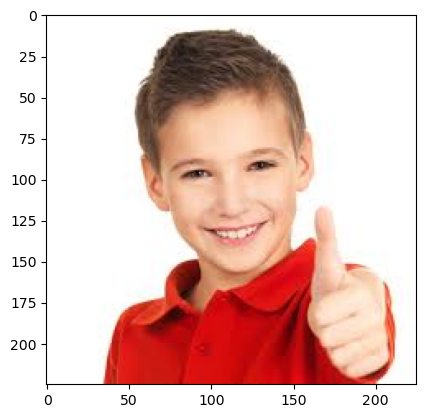

In [35]:
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Display the image
plt.imshow(rgb_frame)
plt.axis('on')  # Turn off axis labels
plt.show()


In [36]:
#we need face detection algorithm(works on gray images)

In [37]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [38]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [39]:
gray.shape

(225, 225)

In [40]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex + ew]

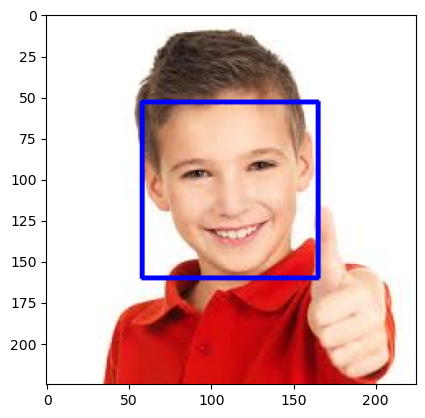

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

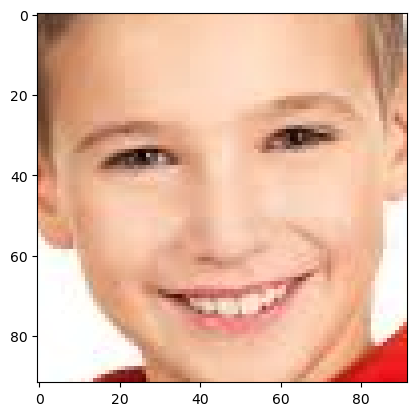

In [42]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [43]:
import cv2
import numpy as np

# Assuming face_roi is the image you want to prepare for prediction

# Resize the image to (224, 224)
final_image = cv2.resize(face_roi, (224, 224))

# Add fourth dimension for batch size
final_image = np.expand_dims(final_image, axis=0)

# Normalize the image
final_image = final_image / 255.0

# Make predictions
predictions = new_model.predict(final_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [44]:
predictions[0]

array([0.3034037 , 0.02044697, 0.24854636, 0.10791492, 0.19918579,
       0.03936385, 0.08113839], dtype=float32)

In [45]:
np.argmax(predictions)

0

In [46]:
frame=cv2.imread("C:/Users/jaich/Downloads/Training/Training/surprise.jpeg")

In [47]:
frame.shape

(183, 275, 3)

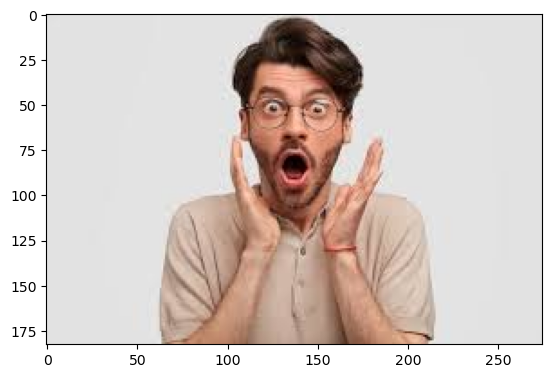

In [48]:
rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Display the image
plt.imshow(rgb_frame)
plt.axis('on')  # Turn off axis labels
plt.show()

In [49]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [50]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [51]:
gray.shape

(183, 275)

In [52]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex + ew]

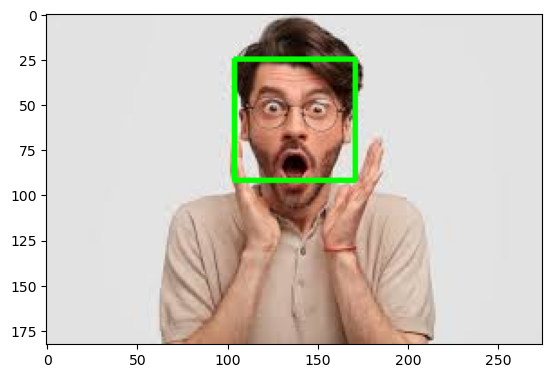

In [53]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

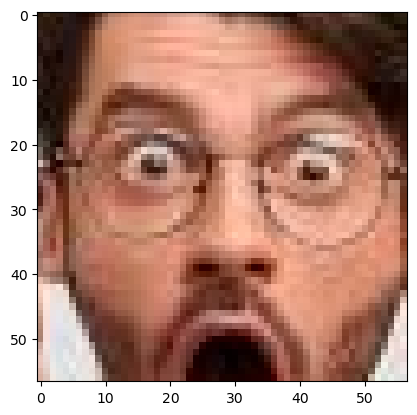

In [54]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [55]:
import cv2
import numpy as np

# Assuming face_roi is the image you want to prepare for prediction

# Resize the image to (224, 224)
final_image = cv2.resize(face_roi, (224, 224))

# Add fourth dimension for batch size
final_image = np.expand_dims(final_image, axis=0)

# Normalize the image
final_image = final_image / 255.0

# Make predictions
predictions = new_model.predict(final_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [56]:
predictions[0]

array([0.13170347, 0.04423842, 0.17127627, 0.18318662, 0.3463146 ,
       0.03583113, 0.08744948], dtype=float32)

In [57]:
np.argmax(predictions)

4

In [58]:
##Realtime Video Demo

In [59]:
import cv2
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="Some text in a box!"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords=((text_offset_x,text_offset_y), (text_offset_x+text_width+2, text_offset_y - text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr,cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale,color=(0,0,0),thickness=1)
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(faces) ==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey: ey+eh, ex:ex+ew]
    final_image=cv2.resize(face_roi, (224,224))
    final_image=np.expand_dims(final_image,axis=0)
    font=cv2.FONT_HERSHEY_SIMPLEX
    Predictions=new_model.predict(final_image)
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    if(np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(Predictions)==1):
        status= "Disgust"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(Predictions)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(Predictions)==4):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(Predictions)==5):
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(Predictions)==6):
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame,status,(x1+int(w1/10),y1 + int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

    cv2.imshow('Face Emotion Recognition',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()
        
        
        
        
        
                      
        
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━